In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
Threshold = 0.5

In [ ]:
ClassLabels = []
with open('coco.names', 'r') as f:
    ClassLabels = f.read().split('\n')
    print(ClassLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [ ]:
print(len(ClassLabels))

91


In [ ]:
configPath = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weightPath = 'frozen_inference_graph.pb'
model = cv2.dnn.DetectionModel(weightPath, configPath)
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7fd2d0818c50>

Height: 636
Width: 1024
Number of channels: 3


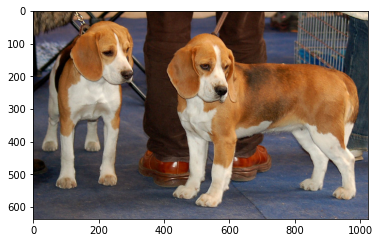

In [ ]:
img = cv2.imread('/image1.jpg' .format(2))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
h,w = img.shape[:2]
print('Height: {0}\nWidth: {1}\nNumber of channels: {2}' .format(h, w, img.shape[2]))

In [ ]:
ClassIndex, confidence, Boundingbox = model.detect(img, Threshold)
print(confidence)

[0.77971685 0.53358287 0.52758455 0.5072432  0.50123817]


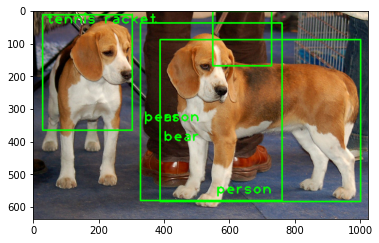

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
for Ind, conf, box in zip(ClassIndex.flatten(), confidence.flatten(), Boundingbox):
  cv2.rectangle(img, box, (0, 255, 0), 4)
  cv2.putText(img, ClassLabels[Ind-1], (box[0]+10, box[0]+10), font, fontScale = 3, color = (0, 255, 0), thickness = 3)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
  cv2.imwrite('/imgage1.jpg', img)